## Matplotlib basics
- Create basic line, bar chart and scatter graphs with population dataset
- Create stack plots and pie charts based on daily activities times


In [1]:
import csv
import numpy as np
import matplotlib.pyplot as plt

my_list = []
with open('data/demographics.csv', 'r') as f:
    reader = csv.reader(f, delimiter=';')
    my_list = list(reader)
demographics = np.array(my_list)

countries = demographics[1:,0:1]
years = demographics[0,4:].astype(np.uint32)
# XXX fix the (A, ) array to (A, 1) shape
years = years[:,np.newaxis]

regions = demographics[1:,1]

# Population growth
population_brazil = demographics[19,4:].astype(np.uint32)
population_brazil = population_brazil[:,np.newaxis]
population_usa = demographics[153,4:].astype(np.uint32)
population_usa = population_usa[:,np.newaxis]

# Population/Life expectancy/GDP per capita in countries
life_exp = demographics[1:,3:4].astype(np.float)
population = demographics[1:,-1].astype(np.uint32)
population = population[:,np.newaxis]
gdp_pc = demographics[1:,2:3].astype(np.float)

In [2]:
# multiplying np arrays
conversion = np.array([0.000001])
population_brazil_in_millions = population_brazil * conversion
population_usa_in_millions = population_usa * conversion
population_in_millions = population * conversion
population_in_millions = population_in_millions.astype(np.int32)

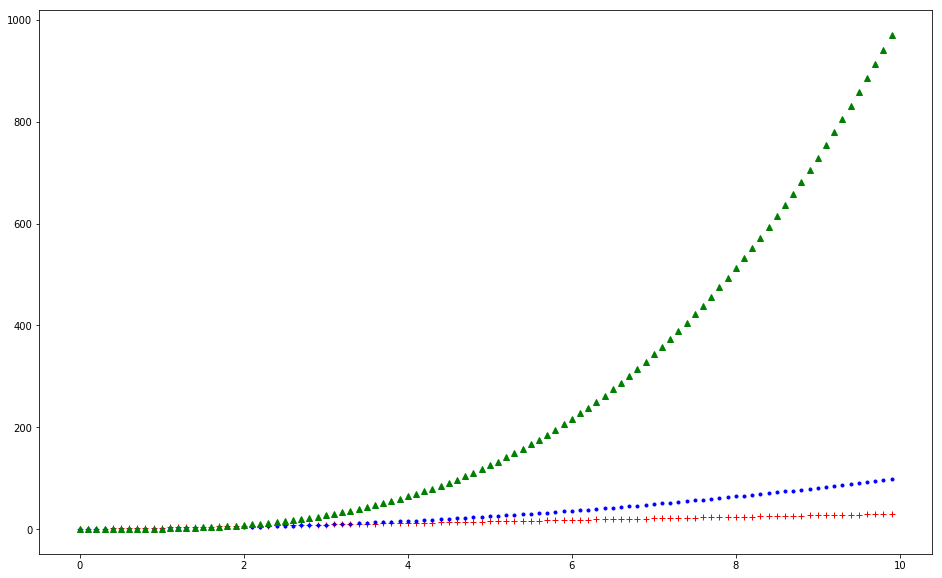

In [3]:
fig = plt.figure(figsize=(16,10))
plt.clf()
# evenly sampled time at 0.1 intervals
t = np.arange(0, 10, 0.1)

# red dashes, blue squares and green triangles
plt.plot(t, t*3, 'r+', t, t**2, 'b.', t, t**3, 'g^')
plt.show()


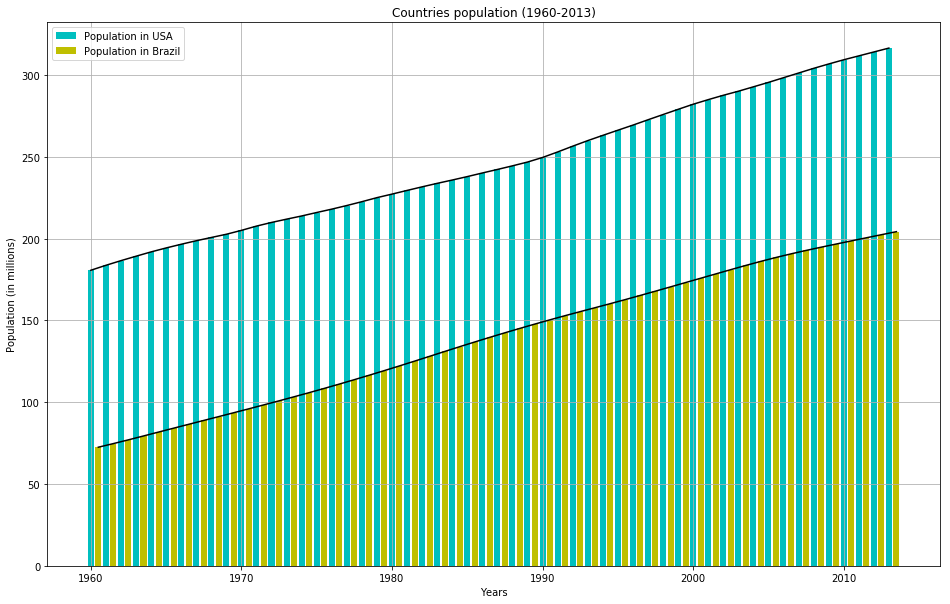

In [4]:
    fig = plt.figure(figsize=(16,10))
    plt.clf()
plt.bar(years, population_usa_in_millions, color='c', width=0.4, label='Population in USA')
plt.bar(years+0.5, population_brazil_in_millions, color='y', width=0.4, label='Population in Brazil')
plt.plot(years, population_usa_in_millions, color='k')
plt.plot(years+0.5, population_brazil_in_millions, color='k')
plt.legend()
plt.ylabel('Population (in millions)')
plt.xlabel('Years')
plt.title('Countries population ('+str(years[0][0])+'-'+str(years[-1][0])+')')
plt.grid(True)
plt.show()

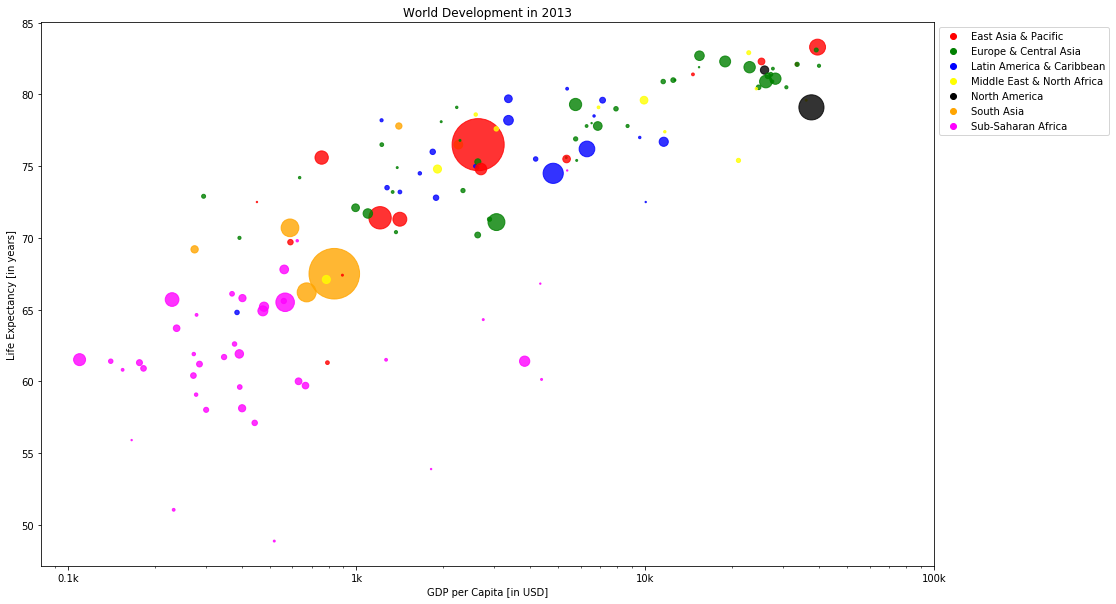

In [5]:
# Clear plot area
plt.clf()

fig = plt.figure(figsize=(16,10))
# Regions in the world
unique_regions = list(np.unique(regions))
all_colors = ['red', 'green', 'blue', 'yellow', 'black', 'orange', 'magenta']

dict_colors = dict(zip(unique_regions, all_colors))

contries_colors = [dict_colors[region] for region in regions]

# c is colors, s is size of points
plt.scatter(gdp_pc, life_exp, s = population_in_millions * 2, c = contries_colors, alpha = 0.8, marker='o')

# Previous customizations
plt.xscale('log') 
plt.xlabel('GDP per Capita [in USD]')
plt.ylabel('Life Expectancy [in years]')
plt.title('World Development in '+str(years[-1][0]))
plt.xticks([100, 1000, 10000, 100000],['0.1k', '1k', '10k', '100k'])
markers = [plt.Line2D([0,0],[0,0],color=color, marker='o', linestyle='') for color in all_colors]
plt.legend(markers, unique_regions, numpoints=1,loc='upper left', bbox_to_anchor=(1,1))

# Display the plot
plt.show()

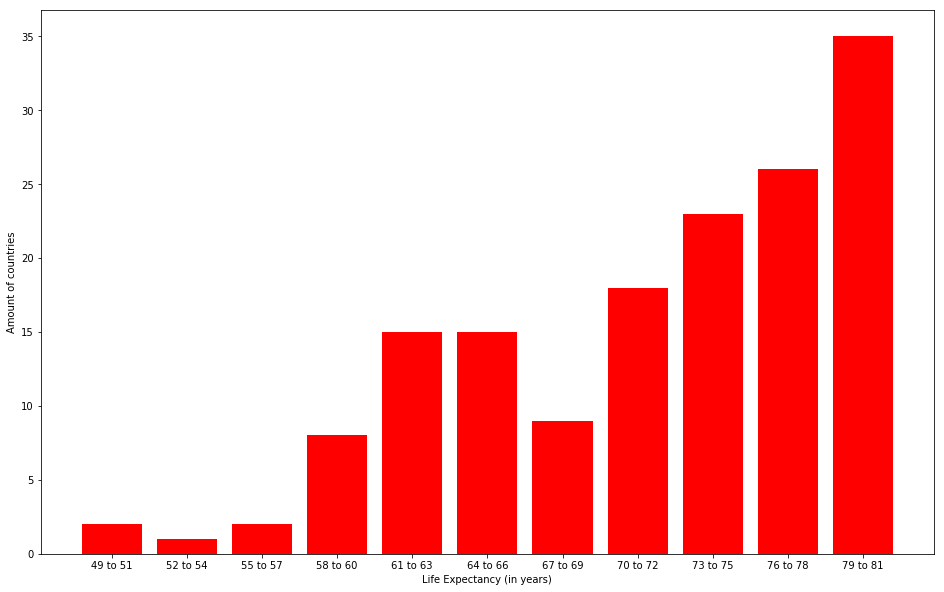

In [6]:
### Draw histogram of life expectancy
# create bins for every three years range (rounding values first)
rounded_life_exp = np.around(life_exp).astype(np.int32)
bins = [i for i in range(np.amin(rounded_life_exp),np.amax(rounded_life_exp), 3)]

plt.clf()
fig=plt.figure(figsize=(16,10))
plt.hist(rounded_life_exp, bins, histtype='bar', rwidth=0.8, color = 'r')

# adjust ticks
values = []
ticks = []
for i in range(len(bins)-1):
    values.append((bins[i] + bins[i+1])/2)
    ticks.append(str(bins[i]) + ' to ' + str(bins[i+1]-1))
plt.xticks(values, ticks)

plt.ylabel('Amount of countries')
plt.xlabel('Life Expectancy (in years)')

plt.show()

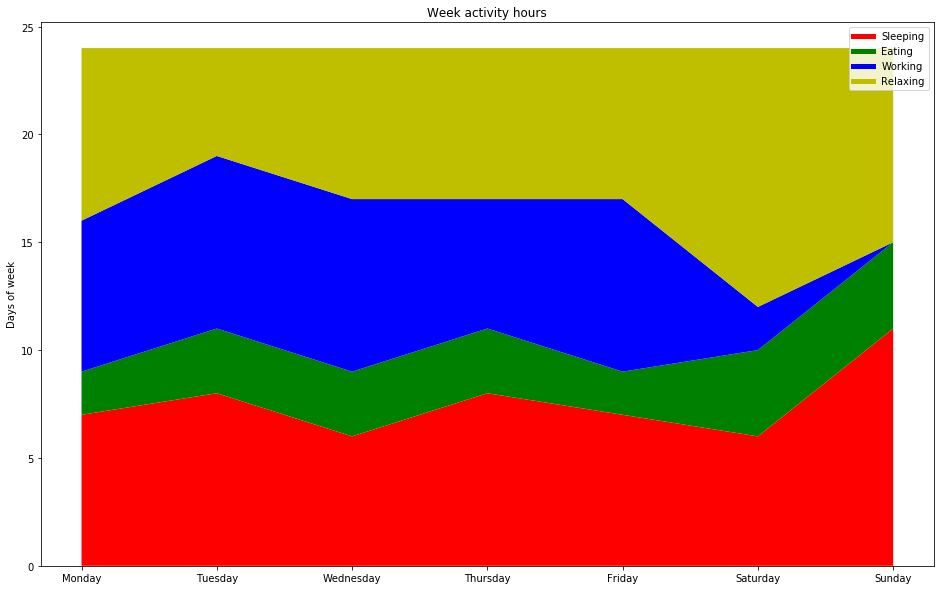

In [7]:
# Example of stackplot

days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
activities = ['Sleeping','Eating','Working','Relaxing']
hours = np.array([[7, 8, 6, 8, 7, 6,11],
         [2, 3, 3, 3, 2, 4, 4],
         [7, 8, 8, 6, 8, 2, 0],
         [8, 5, 7, 7, 7, 12,9]])
colors = ['r','g','b','y']


plt.clf()
fig=plt.figure(figsize=(16,10))
plt.stackplot(range(len(days)), hours[0], hours[1], hours[2], hours[3], colors=colors)

# hacking to show legend
plt.plot([],[],color=colors[0], label=activities[0], linewidth=5)
plt.plot([],[],color=colors[1], label=activities[1], linewidth=5)
plt.plot([],[],color=colors[2], label=activities[2], linewidth=5)
plt.plot([],[],color=colors[3], label=activities[3], linewidth=5)
plt.legend()

plt.xticks(range(len(days)), days)
plt.ylabel('Days of week')
plt.title('Week activity hours')
plt.show()

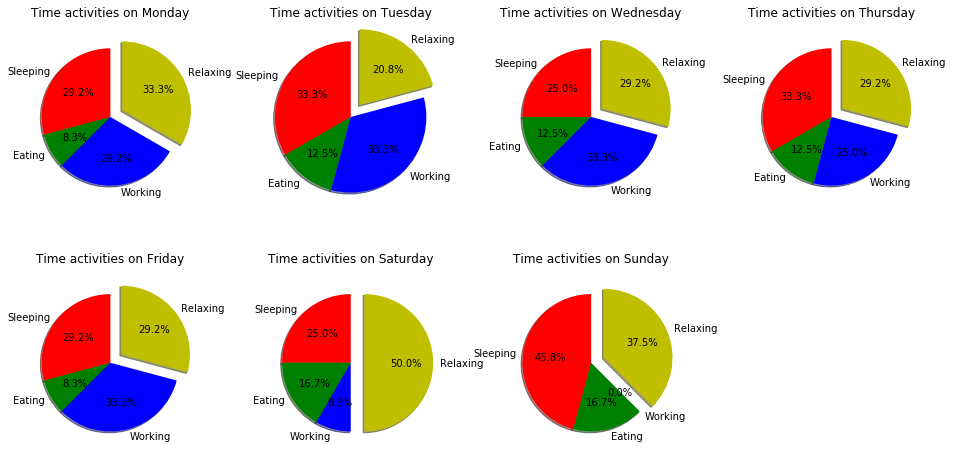

In [8]:
# Example of pie chart

plt.clf()
fig = plt.figure(figsize=(16,8))
for day in range(len(days)):
    # 8 lines, 1 column
    ax = fig.add_subplot(2,4,day+1)
    ax.axis('equal')

    ax.pie(hours[:,day], 
            labels=activities, 
            colors=colors, 
            startangle=90, 
            shadow=True, 
            explode=(0,0,0,0.2),
            autopct='%1.1f%%')
    ax.set_title('Time activities on '+ days[day])

fig.subplots_adjust(hspace=0.3, wspace=0.4)
plt.show()
